In [12]:
# Jupyter Notebook での Auto Reload 設定
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# pandas の設定（全行表示を有効化）
import pandas as pd
pd.set_option("display.max_rows", None)

# 警告を無視
import warnings
warnings.filterwarnings('ignore')

# scikit-learn の iris データセットをロード
from sklearn.datasets import load_iris

# 1. `iris` データセットをロード
iris = load_iris()

# 2. pandas の DataFrame に変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. 最初の5行を表示
df.head(20) 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
# 変数間の相関係数を計算
correlation_matrix = df.corr()

# 相関係数行列を表示
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


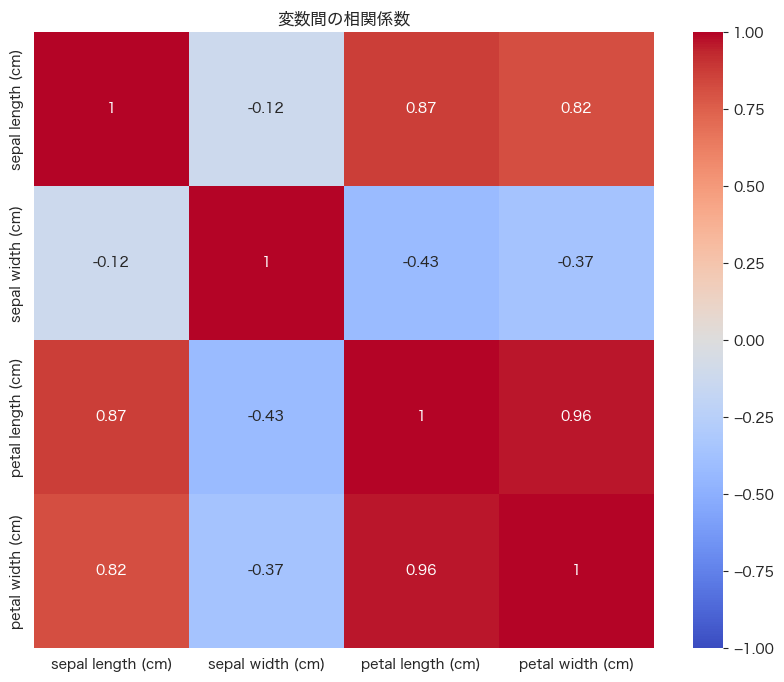

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 変数間の相関係数を計算
correlation_matrix = df.corr()
# ヒートマップで相関係数を可視化
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('変数間の相関係数')
plt.show()

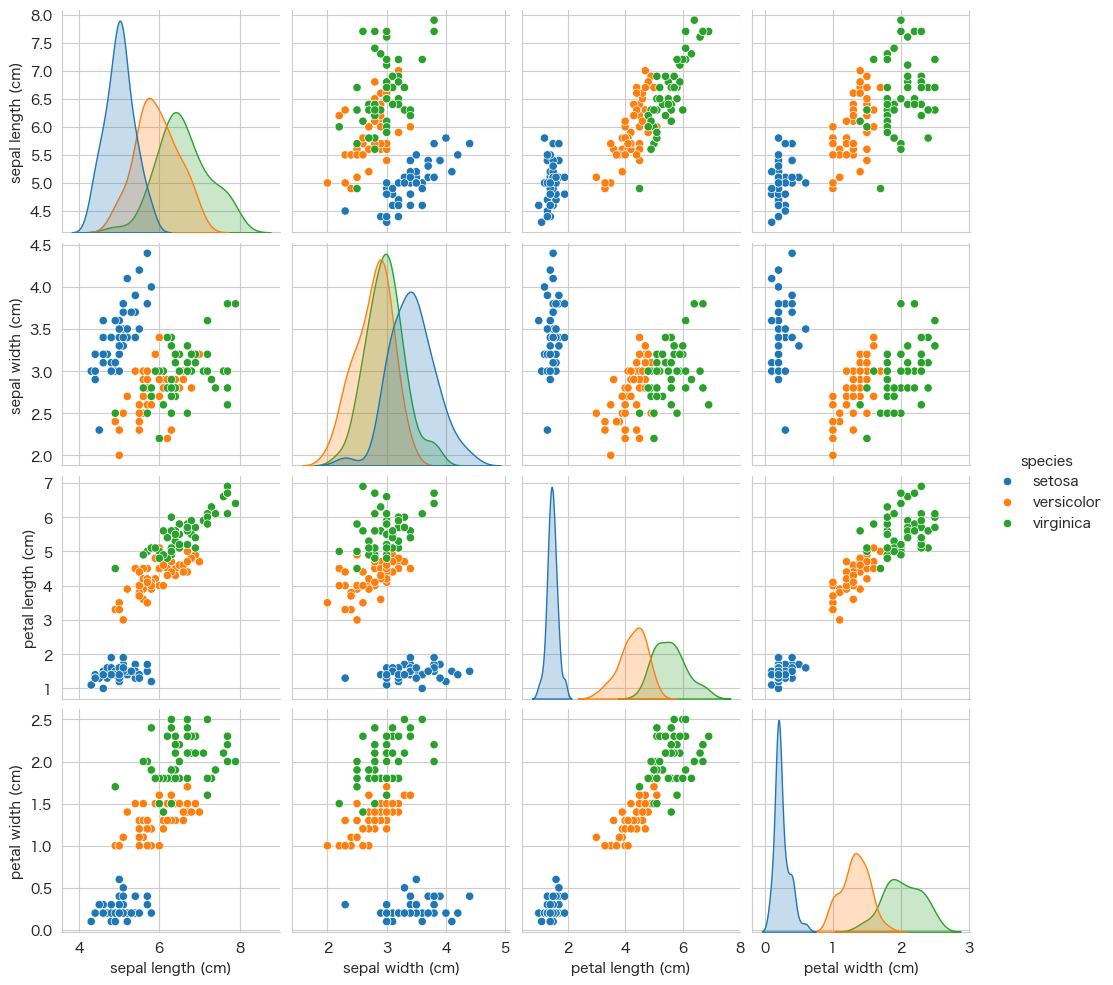

In [16]:
# 必要なライブラリをインポート
import seaborn as sns
import matplotlib.pyplot as plt

# ターゲット（品種）の列を追加
df['species'] = iris.target_names[iris.target]

# ペアプロットを作成
sns.pairplot(df, hue='species')

# プロットを表示
plt.show()

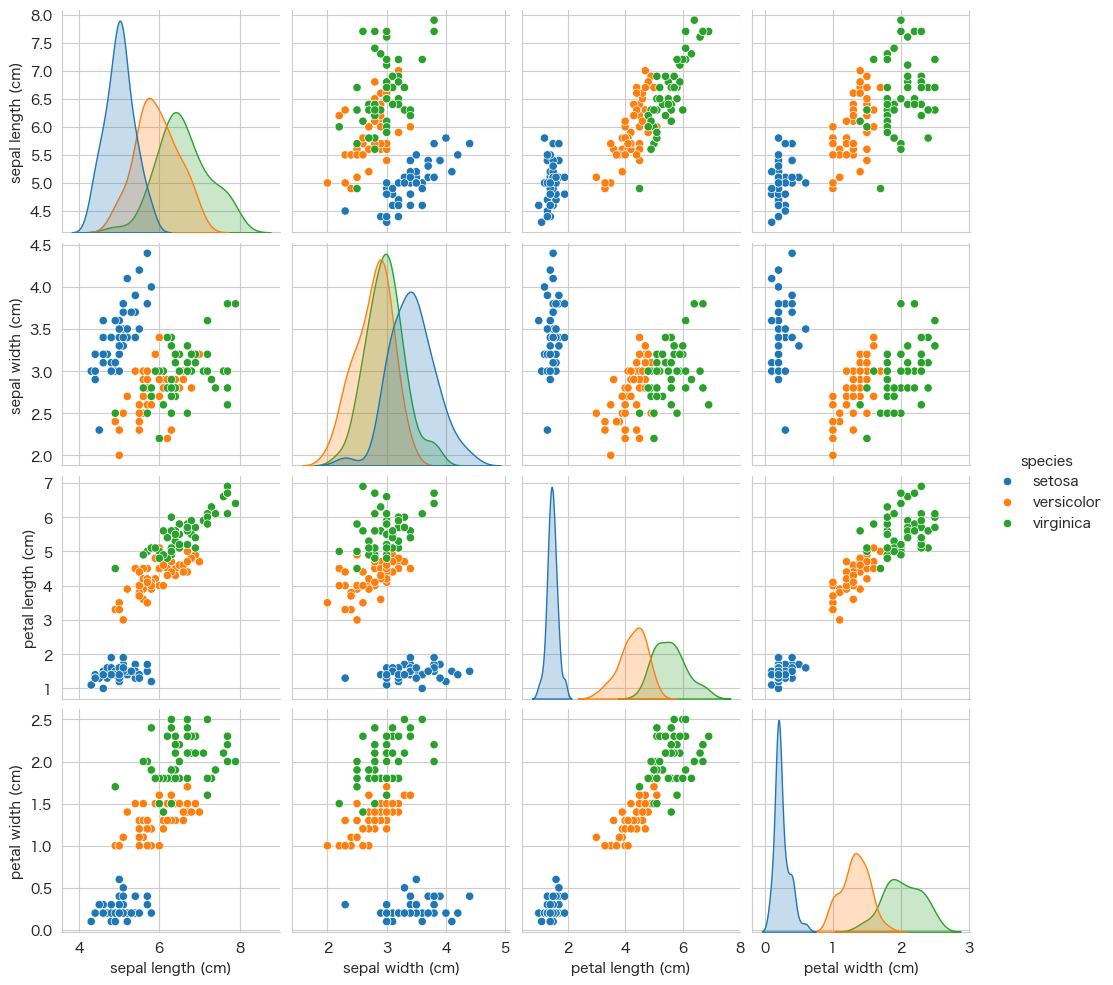

In [17]:
# ペアプロットを作成（対角成分をカーネル密度推定にする）
sns.pairplot(df, hue='species', diag_kind='kde')

# プロットを表示
plt.show()

各モデルの5分割交差検証の結果:
--------------------------------------------------
                   モデル      平均精度      標準偏差
0                  SVC  0.966667  0.021082
1        Random Forest  0.966667  0.021082
2       MLP Classifier  0.960000  0.024944
3                  KNN  0.960000  0.032660
4        Decision Tree  0.953333  0.026667
5    Gradient Boosting  0.953333  0.026667
6  Logistic Regression  0.953333  0.033993
7           Linear SVC  0.953333  0.040000


最良のモデル: SVC
平均精度: 0.9667


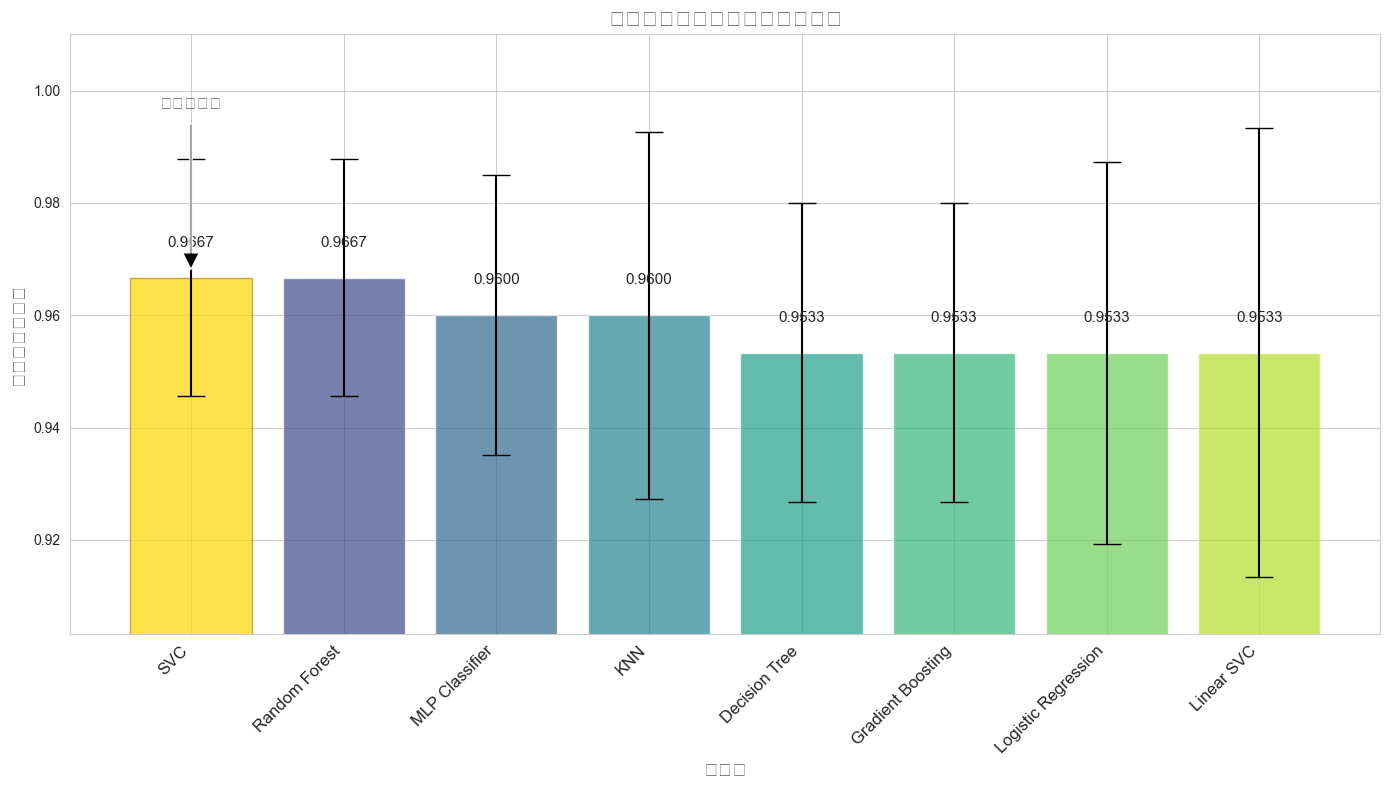

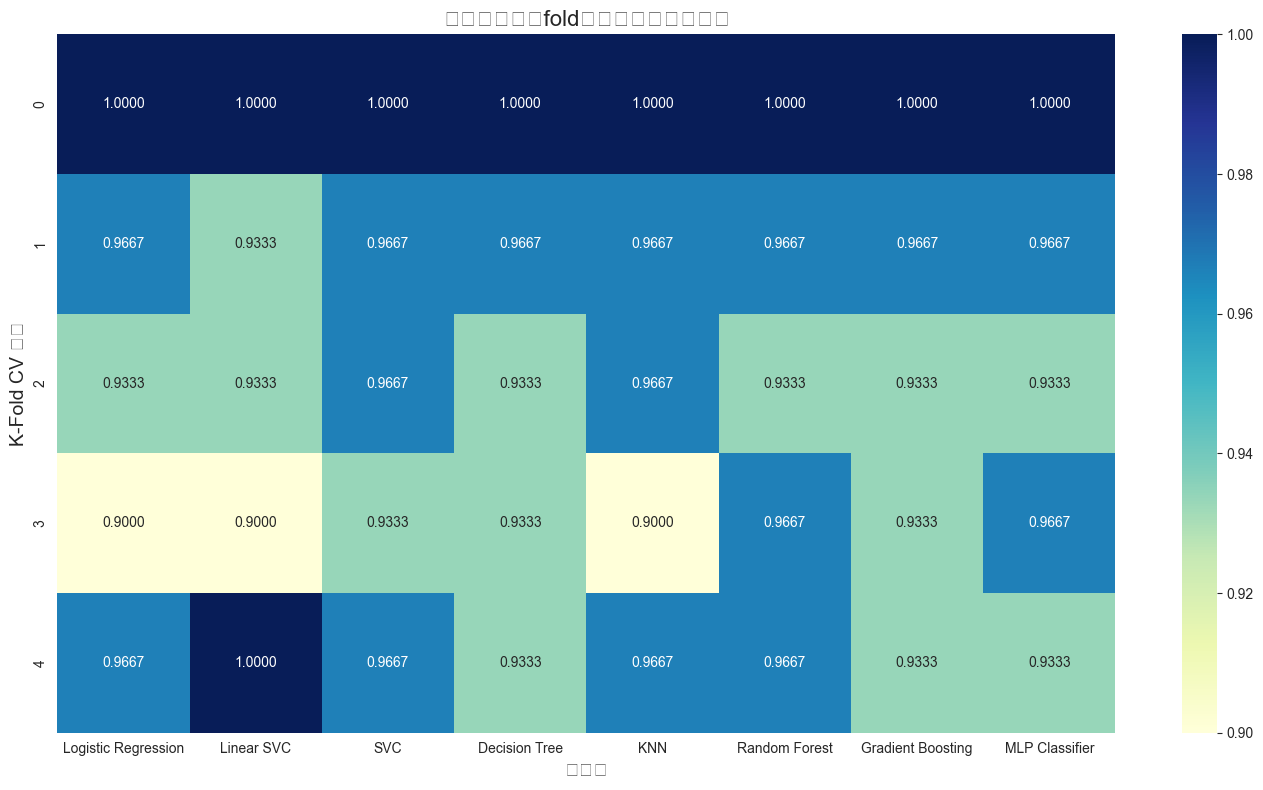

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# irisデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# 5分割のk-fold交差検証を設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# テストするモデルのリスト
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVC': LinearSVC(random_state=42, max_iter=10000),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000)
}

# LinearRegressionは分類問題には適していないため除外（回帰モデルのため）

# 各モデルをk-fold検証で評価
results = {}
for name, model in models.items():
    # スケーリングを含むパイプライン
    pipeline = make_pipeline(StandardScaler(), model)
    
    # 交差検証スコアを計算
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    
    # 結果を保存
    results[name] = {
        'mean_score': np.mean(scores),
        'std_score': np.std(scores),
        'all_scores': scores
    }

# 結果をデータフレームに変換して表示
results_df = pd.DataFrame({
    'モデル': list(results.keys()),
    '平均精度': [results[name]['mean_score'] for name in results.keys()],
    '標準偏差': [results[name]['std_score'] for name in results.keys()]
})
# 平均精度で降順にソート
results_df = results_df.sort_values('平均精度', ascending=False).reset_index(drop=True)

# 結果の表示
print("各モデルの5分割交差検証の結果:")
print("-" * 50)
print(results_df)
print("\n")

# 最良のモデルを特定
best_model_name = results_df.iloc[0]['モデル']
best_score = results_df.iloc[0]['平均精度']
print("=" * 50)
print(f"最良のモデル: {best_model_name}")
print(f"平均精度: {best_score:.4f}")
print("=" * 50)

# グラフの作成
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 棒グラフの作成 - 平均精度でソート済みのデータを使用
bars = plt.bar(results_df['モデル'], results_df['平均精度'], 
               yerr=results_df['標準偏差'], capsize=10, 
               alpha=0.7, color=sns.color_palette("viridis", len(results_df)))

# 最良のモデルを強調表示
best_idx = results_df['モデル'].tolist().index(best_model_name)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('darkgoldenrod')

# グラフの詳細設定
plt.title('モデルごとの交差検証精度比較', fontsize=16)
plt.xlabel('モデル', fontsize=14)
plt.ylabel('平均精度スコア', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(min(results_df['平均精度']) - 0.05, 1.01)  # 下限を調整

# 各バーの上に数値を表示
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{results_df.iloc[i]["平均精度"]:.4f}', ha='center', va='bottom', fontsize=11)

# 最良のモデルにラベル付け
plt.annotate('最良モデル', xy=(best_idx, best_score),
            xytext=(best_idx, best_score + 0.03),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# ヒートマップで各モデルの各foldでのスコアを可視化
plt.figure(figsize=(14, 8))
heatmap_data = pd.DataFrame()

for name, result in results.items():
    heatmap_data[name] = result['all_scores']

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('各モデルの各foldにおける精度スコア', fontsize=16)
plt.xlabel('モデル', fontsize=14)
plt.ylabel('K-Fold CV 分割', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#pip install japanize_matplotlib

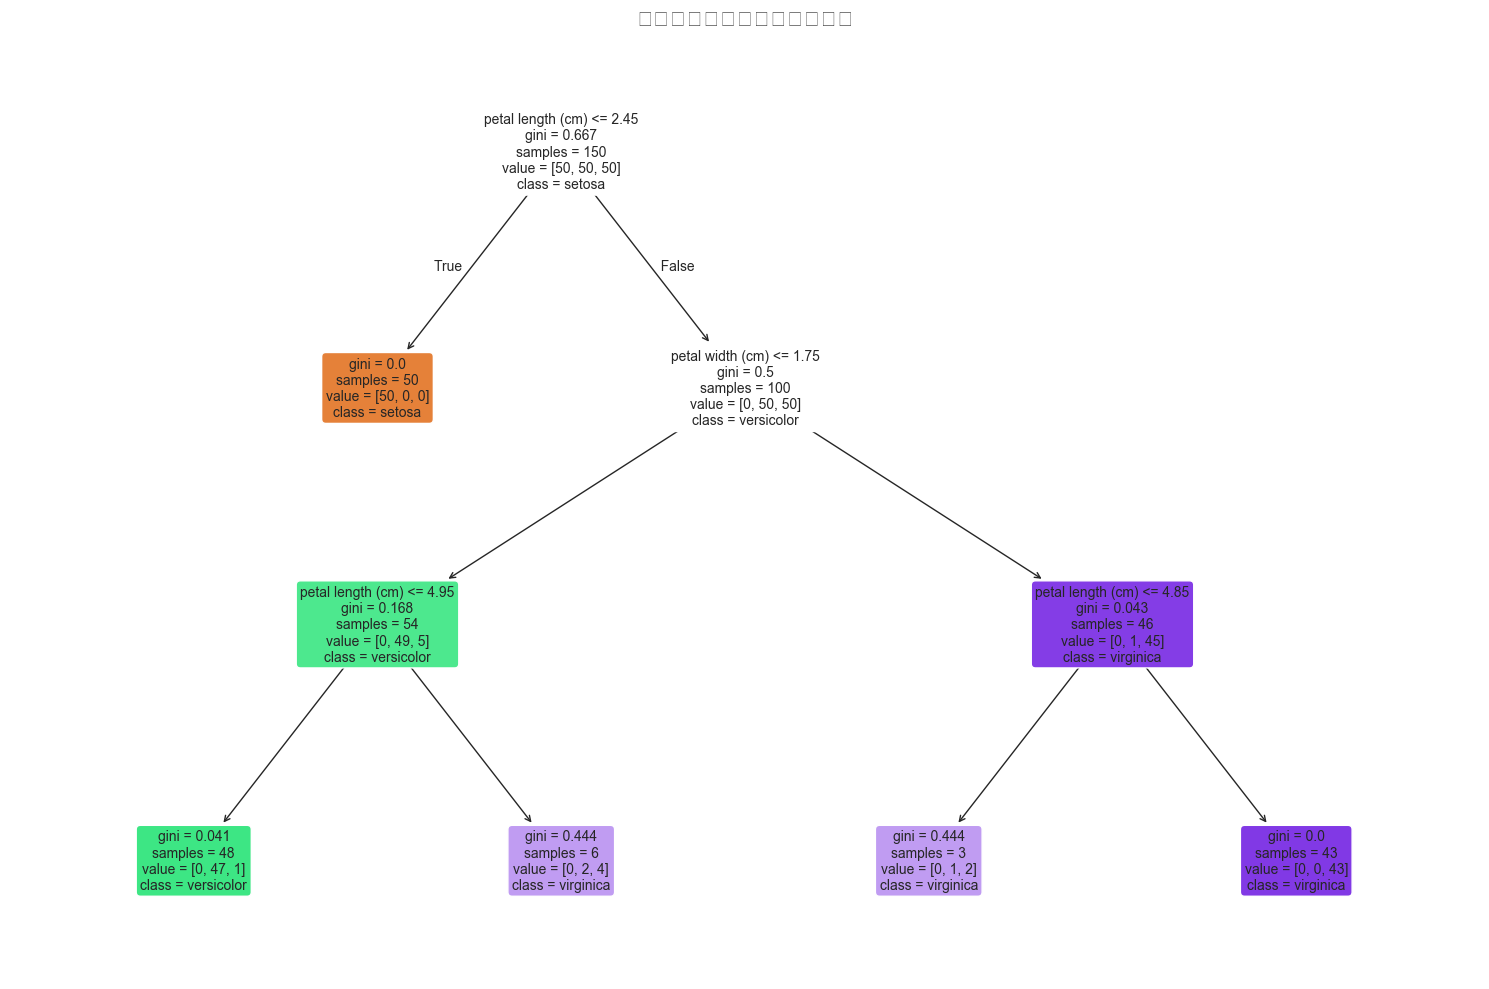

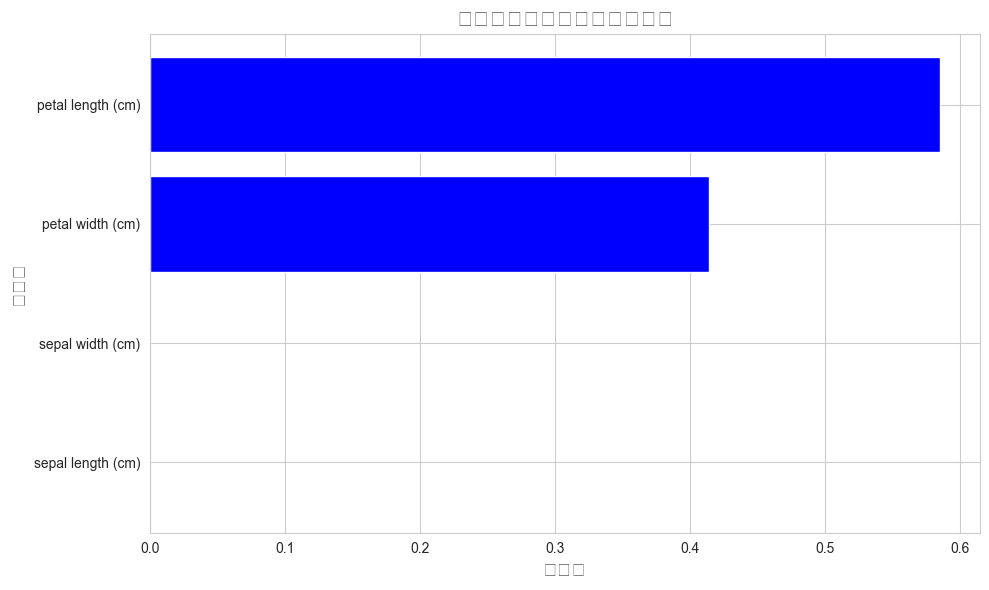

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 決定木モデルのトレーニング
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 決定木の可視化
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, 
          class_names=iris.target_names, rounded=True, fontsize=10)
plt.title('アヤメデータセットの決定木', fontsize=16)
plt.tight_layout()
plt.show()

# 特徴量の重要度の可視化
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('決定木モデルの特徴量重要度', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('重要度', fontsize=14)
plt.ylabel('特徴量', fontsize=14)
plt.tight_layout()
plt.show()